In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import ttest_ind
from ydata_profiling import ProfileReport
import seaborn as sns

# Task 1

In [3]:
website_df = pd.read_csv('data/website_ab_test.csv')

In [4]:
website_df

Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0    Light Theme            0.054920         0.282367     0.405085   
1    Light Theme            0.113932         0.032973     0.732759   
2     Dark Theme            0.323352         0.178763     0.296543   
3    Light Theme            0.485836         0.325225     0.245001   
4    Light Theme            0.034783         0.196766     0.765100   
..           ...                 ...              ...          ...   
995   Dark Theme            0.282792         0.401605     0.200720   
996   Dark Theme            0.299917         0.026372     0.762641   
997  Light Theme            0.370254         0.019838     0.607136   
998  Light Theme            0.095815         0.137953     0.458898   
999   Dark Theme            0.342588         0.061315     0.452410   

     Scroll_Depth  Age   Location  Session_Duration Purchases Added_to_Cart  
0       72.489458   25    Chennai              1535        No           Yes  
1       61.858568   19       Pune               303        No           Yes  
2       45.737376   47    Chennai               563       Yes           Yes  
3       76.305298   58       Pune               385       Yes            No  
4       48.927407   25  New Delhi              1437        No            No  
..            ...  ...        ...               ...       ...           ...  
995     68.478822   25    Kolkata               321       Yes           Yes  
996     73.019821   38    Chennai              1635       Yes           Yes  
997     33.963298   32  Bangalore              1237        No           Yes  
998     37.429284   24    Chennai               893       Yes            No  
999     31.613326   33    Chennai               129       Yes           Yes  

[1000 rows x 10 columns]

In [5]:
website_df.isna().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [6]:
website_df.duplicated().sum()

0

In [7]:
website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [8]:
website_df.describe()

Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
count         1000.000000      1000.000000  1000.000000   1000.000000   
mean             0.256048         0.253312     0.505758     50.319494   
std              0.139265         0.139092     0.172195     16.895269   
min              0.010767         0.010881     0.200720     20.011738   
25%              0.140794         0.131564     0.353609     35.655167   
50%              0.253715         0.252823     0.514049     51.130712   
75%              0.370674         0.373040     0.648557     64.666258   
max              0.499989         0.498916     0.799658     79.997108   

               Age  Session_Duration  
count  1000.000000       1000.000000  
mean     41.528000        924.999000  
std      14.114334        508.231723  
min      18.000000         38.000000  
25%      29.000000        466.500000  
50%      42.000000        931.000000  
75%      54.000000       1375.250000  
max      65.000000       1797.000000

In [9]:
website_df['Theme'].value_counts()

Theme
Dark Theme     514
Light Theme    486
Name: count, dtype: int64

### Let's formulate a null and alternative hypothesis of the influence of color theme on user engagement.


### Null Hypothesis (H₀):
### The mean Scroll_Depth for dark and light theme users is the same.
### μ₁ = μ₂

### Alternative Hypothesis (H₁):
### The mean Scroll_Depth differs between dark and light themes.
### μ₁ ≠ μ₂

### To perform a correct t-test, we need to fulfill a number of conditions, such as:
### 1) Independence of observations
### 2) Normal distribution in each group
### 3) Equality of variances
### 4) Absence of outliers 

In [10]:
light_df = website_df[website_df['Theme'] == 'Light Theme'].copy()
dark_df = website_df[website_df['Theme'] == 'Dark Theme'].copy()
light_df

Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0    Light Theme            0.054920         0.282367     0.405085   
1    Light Theme            0.113932         0.032973     0.732759   
3    Light Theme            0.485836         0.325225     0.245001   
4    Light Theme            0.034783         0.196766     0.765100   
5    Light Theme            0.173419         0.266987     0.786825   
..           ...                 ...              ...          ...   
989  Light Theme            0.126083         0.416115     0.518858   
991  Light Theme            0.492991         0.293247     0.255914   
994  Light Theme            0.144825         0.231131     0.523572   
997  Light Theme            0.370254         0.019838     0.607136   
998  Light Theme            0.095815         0.137953     0.458898   

     Scroll_Depth  Age   Location  Session_Duration Purchases Added_to_Cart  
0       72.489458   25    Chennai              1535        No           Yes  
1       61.858568   19       Pune               303        No           Yes  
3       76.305298   58       Pune               385       Yes            No  
4       48.927407   25  New Delhi              1437        No            No  
5       66.120300   65    Chennai              1244       Yes            No  
..            ...  ...        ...               ...       ...           ...  
989     57.394649   44  New Delhi               651        No            No  
991     56.857399   65       Pune              1025       Yes           Yes  
994     49.864467   32       Pune               322       Yes            No  
997     33.963298   32  Bangalore              1237        No           Yes  
998     37.429284   24    Chennai               893       Yes            No  

[486 rows x 10 columns]

### We have two independent groups, so the first condition is fulfilled.

Mean: 49.92640393998572, std: 16.784398412551667
Mean: 50.73523168948282, std: 16.98457400126125


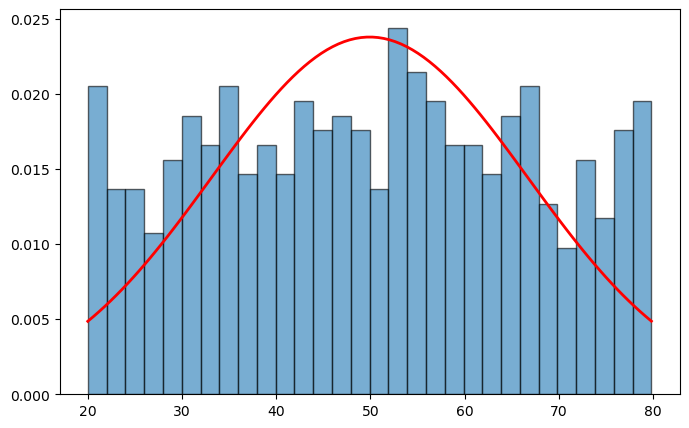

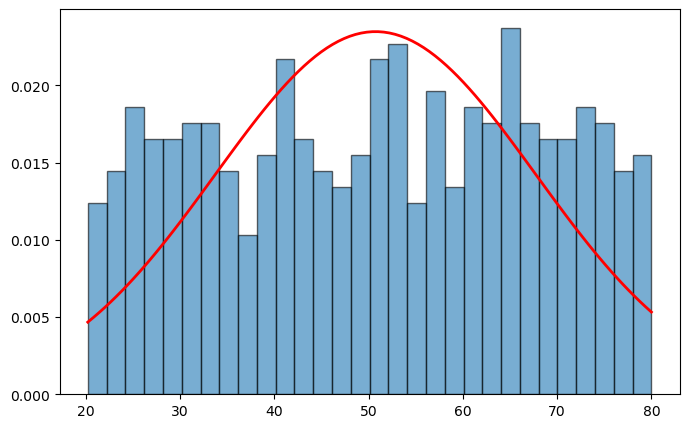

In [11]:
column = 'Scroll_Depth'
for df in [dark_df, light_df]:
    mean = np.mean(df[column])
    std = np.std(df[column])
    print(f'Mean: {mean}, std: {std}')
    plt.figure(figsize=(8, 5))
    count, bins, ignored = plt.hist(
        df[column], bins=30, density=True, edgecolor='k', alpha=0.6)

    x = np.linspace(min(df[column]),
                    max(df[column]), 100)
    plt.plot(x, norm.pdf(x, mean, std), 'r', linewidth=2)
    plt.show

### As we can see from the graphs, our distribution is not completely normal, but since we have a fairly large sample size, this point can be disregarded.
### It is also worth noting the presence of something similar to outliers on the first graph, but I think this will not have a significant impact on our test.

In [12]:
stat, p = levene(dark_df[column], light_df[column])
print("p-value:", p)


p-value: 0.5691109069920541


### The p-value of Levene's test shows whether we can consider the variances in the groups to be equal.

### If p > 0.05 → the variances are equal (we do not reject the hypothesis of equality of variances).
### In our case, we consider the variances to be equal.

In [13]:
t_stat, p_value = ttest_ind(dark_df[column], light_df[column], equal_var=True)
print(f"T-stat: {t_stat.round(2)}, P-value: {p_value.round(2)}")

T-stat: -0.76, P-value: 0.45


### P-value = 0.45 > 0.05, so there is no statistically significant difference between the mean Scroll_Depth values for Dark Theme and Light Theme.

### That is, based on this data, we cannot conclude that themes have a significant impact on Scroll Depth.
### So, we don't have any reason to reject the null hypothesis.

# Task 2 

In [14]:
insurance_df = pd.read_csv('data/insurance.csv')

In [15]:
insurance_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [16]:
insurance_df.duplicated().sum()

1

In [17]:
insurance_df.drop_duplicates(inplace=True)

In [18]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [20]:
insurance_df.describe()

age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

In [21]:
for var in insurance_df.select_dtypes('object').columns:
    display(insurance_df[var].value_counts())

sex
male      675
female    662
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [22]:
profile = ProfileReport(insurance_df, title="Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 437.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### The graphs for the charges and bmi columns show high values in the data. I assume that these are real data and that they may skew the results of both the analysis and the model trained on such data. Let's confirm our findings using the IQR outlier detection method.

In [23]:
for column in ['bmi', 'charges']:
    print(f"\n--- Outlier Detection for '{column}' ---")

    Q1 = np.percentile(insurance_df[column], 25)
    Q3 = np.percentile(insurance_df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = insurance_df[(insurance_df[column] < lower_bound) | (
        insurance_df[column] > upper_bound)]

    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    print("Outlier values:")
    print(outliers[[column]])


--- Outlier Detection for 'bmi' ---
Q1 (25th percentile): 26.29
Q3 (75th percentile): 34.7
IQR: 8.410000000000004
Lower bound: 13.674999999999994
Upper bound: 47.31500000000001
Number of outliers: 9
Outlier values:
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13

--- Outlier Detection for 'charges' ---
Q1 (25th percentile): 4746.344
Q3 (75th percentile): 16657.71745
IQR: 11911.37345
Lower bound: -13120.716174999998
Upper bound: 34524.777625
Number of outliers: 139
Outlier values:
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


### As you can see, IQR also highlights these values, so we will consider these values to be outliers and clean them up.

In [24]:
for column in ['bmi', 'charges']:
    median = np.median(insurance_df[column])
    mad = np.median(np.abs(insurance_df[column] - median))
    modified_z = 0.6745 * (insurance_df[column] - median) / mad

    df_clean = insurance_df[np.abs(modified_z) < 3]

### We clean the data in the columns using Modified Z-Score.

In [25]:
profile = ProfileReport(df_clean, title="Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 542.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### As we can see, all large values have been removed.

# Task 3

In [42]:
survey_df = pd.read_csv('data/train.csv', index_col='Unnamed: 0')

In [43]:
survey_df

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
103899   94171  Female  disloyal Customer   23  Business travel       Eco   
103900   73097    Male     Loyal Customer   49  Business travel  Business   
103901   68825    Male  disloyal Customer   30  Business travel  Business   
103902   54173  Female  disloyal Customer   22  Business travel       Eco   
103903   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4

In [44]:
survey_df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [45]:
survey_df[survey_df['Arrival Delay in Minutes'].isna()]

id  Gender      Customer Type  Age   Type of Travel     Class  \
213      49608  Female     Loyal Customer   38  Business travel       Eco   
1124     73442    Male     Loyal Customer   53  Personal Travel       Eco   
1529     71178    Male     Loyal Customer   39  Business travel  Business   
2004     72940  Female  disloyal Customer   26  Business travel  Business   
2108    116374  Female     Loyal Customer   24  Personal Travel       Eco   
...        ...     ...                ...  ...              ...       ...   
102067   36729    Male     Loyal Customer   49  Personal Travel  Eco Plus   
102384   71241    Male     Loyal Customer   58  Business travel       Eco   
102552   27684  Female  disloyal Customer   29  Business travel       Eco   
102960   36787    Male     Loyal Customer   58  Business travel       Eco   
103540   45022  Female     Loyal Customer   33  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
213                 109                      5   
1124               1012                      3   
1529                733                      2   
2004               1035                      3   
2108                417                      2   
...                 ...                    ...   
102067             1249                      2   
102384              733                      3   
102552             1107                      2   
102960             1088                      4   
103540              359                      4   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
213                                     3                       3  ...   
1124                                    2                       3  ...   
1529                                    5                       5  ...   
2004                                    3                       3  ...   
2108                                    1                       2  ...   
...                                   ...                     ...  ...   
102067                                  5                       2  ...   
102384                                  3                       3  ...   
102552                                  1                       1  ...   
102960                                  4                       1  ...   
103540                                  4                       4  ...   

        Inflight entertainment  On-board service  Leg room service  \
213                          5                 5                 2   
1124                         4                 4                 4   
1529                         2                 2                 2   
2004                         2                 3                 3   
2108                         5                 1                 4   
...                        ...               ...               ...   
102067                       3                 4                 5   
102384                       3                 3                 1   
102552                       5                 4                 1   
102960                       5                 1                 5   
103540                       4                 3                 2   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
213                    4                1                 1            5   
1124                   4                3                 3            4   
1529                   2                2                 2            3   
2004                   4                5                 5            2   
2108                   2                1                 2            5   
...                  ...              ...               ...          ...   
102067                 4                3                 4            3   
102384                 2                4                 2            3   
102552                 5                5                 3            5

In [46]:
survey_df.loc[survey_df['Arrival Delay in Minutes'].isna() & (survey_df['Departure Delay in Minutes'] >= 60),'Arrival Delay in Minutes'] = survey_df['Departure Delay in Minutes']
survey_df['Arrival Delay in Minutes'] = survey_df['Arrival Delay in Minutes'].fillna(0)

In [47]:
survey_df.duplicated().sum()

0

In [48]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [49]:
survey_df.describe()

id            Age  Flight Distance  Inflight wifi service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean    64924.210502      39.379706      1189.448375               2.729683   
std     37463.812252      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%     32533.750000      27.000000       414.000000               2.000000   
50%     64856.500000      40.000000       843.000000               3.000000   
75%     97368.250000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103904.000000  
mean                    14.815618                 15.221252  
std                     38.230901                 38.808031  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [ ]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
X = survey_df.select_dtypes(include=['float', 'int']).copy()
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [54]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

kmo_all, kmo_model = calculate_kmo(X_scaled)
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(
    X_scaled)

print(f"KMO Score: {kmo_model:.3f}")
print(f"Bartlett's Test p-value: {bartlett_p_value:.3f}")

KMO Score: 0.731
Bartlett's Test p-value: 0.000


c:\Users\User\anaconda3\envs\faiss_gpu_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


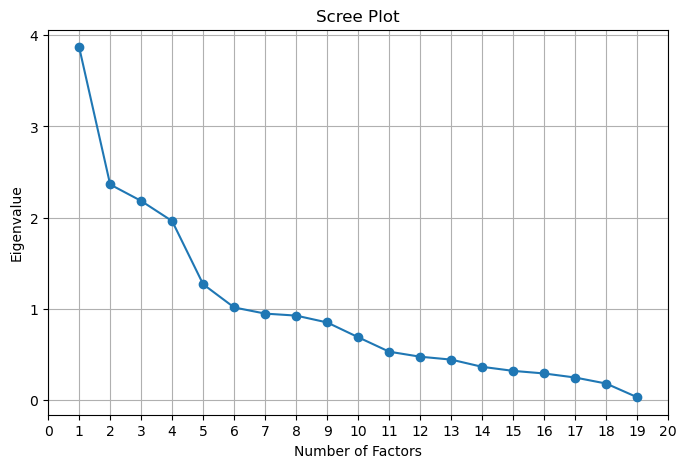

In [56]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(X_scaled)
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.yticks([0, 1, 2, 3, 4])
plt.xticks(range(0, 21))
plt.title('Scree Plot')
plt.grid()
plt.show()

c:\Users\User\anaconda3\envs\faiss_gpu_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                   Convenience   Service  Digital Services  \
id                                    0.018831  0.091593         -0.000314   
Age                                   0.132455 -0.007195          0.045240   
Flight Distance                       0.142493  0.113133          0.037577   
Inflight wifi service                 0.193166  0.128090          0.747317   
Departure/Arrival time convenient    -0.011537  0.056713          0.502078   
Ease of Online booking                0.068729  0.022148          0.930858   
Gate location                        -0.014857 -0.033066          0.504138   
Food and drink                        0.740599  0.027654         -0.027105   
Online boarding                       0.424725  0.123950          0.348142   
Seat comfort                          0.800185  0.097998         -0.005809   
Inflight entertainment                0.731186  0.478155         -0.018705   
On-board service                      0.084572  0.701193        

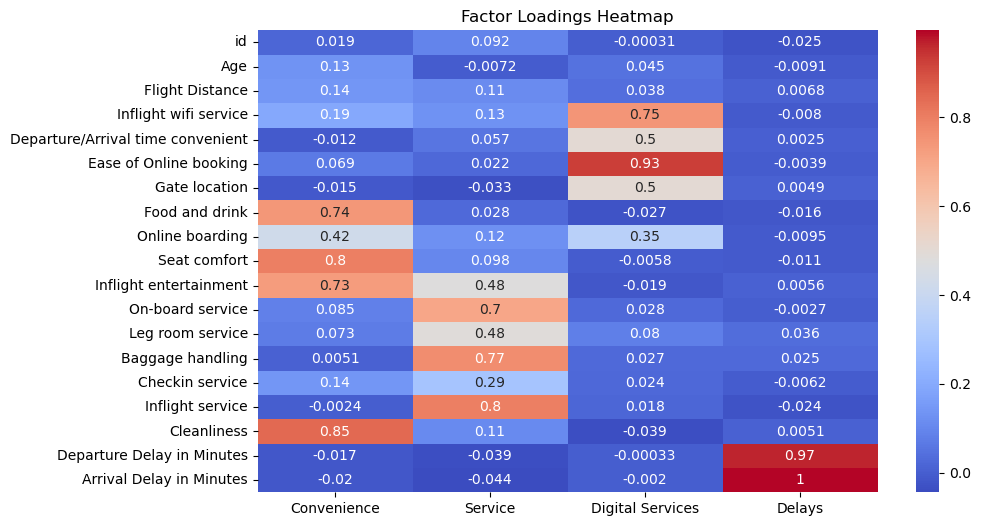

In [61]:
n_factors = 4
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(X_scaled)

loadings = pd.DataFrame(fa.loadings_, index=X.columns)
factor_names = ['Convenience', 'Service',
                'Digital Services', 'Delays']
loadings.columns = factor_names
print(loadings)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap="coolwarm", annot=True)
plt.title('Factor Loadings Heatmap')
plt.show()

### As a result of factor analysis with varimax rotation, four latent factors were identified that explain the structure of dependencies between characteristics related to the quality of aviation services. The analysis revealed clear groupings of variables that allow interpreting hidden measurements of customer experience.